In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('./../../')
sys.path.append('./..')
sys.path.append('./../../designer/script/')

import numpy as np
import matplotlib.pyplot as plt
import copy
import dill

from film import FreeFormFilm, BaseFilm, TwoMaterialFilm, EqOTFilm
from design import BaseDesign
from spectrum import BaseSpectrum, Spectrum
from optimizer.adam import AdamFreeFormOptimizer

from analyze_utils.make_design import make_edgefilter_design, make_triband_filter_design, make_reflection_design, get_minus_filter_spec

from utils.loss import calculate_RMS_f_spec
from analyze_utils.result_io import save, load
from analyze_utils.structure import plot_layer_thickness



In [28]:
wls = np.hstack((np.linspace(300, 390, 100), np.linspace(401, 699, 500), np.linspace(730, 800, 100),))

target = get_minus_filter_spec(wls, h=0.5, left=400, right=700)

total_gt = 5000 # 5um, since n\approx 2
init_n = np.zeros(1000) + 2

film = FreeFormFilm(init_n, total_gt, 1.94, 1.94)

film.add_spec_param(0., wls)

In [29]:
optimizer = AdamFreeFormOptimizer(film, [target], 1000, 0.01, n_min=1.75, n_max=2.15, show=True)
films, losses = optimizer.optimize()

dill.dump(film, file=open('./film_design_tmp', 'wb'))

iter 0, loss 0.4183339499614997
iter 1, loss 0.41058251810262675
iter 2, loss 0.4000544054823175
iter 3, loss 0.3899260154915558
iter 4, loss 0.38123628331066584
iter 5, loss 0.3720260757894266
iter 6, loss 0.3605170416248126
iter 7, loss 0.34644486761907706
iter 8, loss 0.33052664015586763
iter 9, loss 0.3137274983034141
iter 10, loss 0.29657139138363725
iter 11, loss 0.2792584460329708
iter 12, loss 0.262348861313855
iter 13, loss 0.2468034689215693
iter 14, loss 0.23351594387085764
iter 15, loss 0.22332664445075792
iter 16, loss 0.2158723668744606
iter 17, loss 0.21097927436507405
iter 18, loss 0.20842285813650624
iter 19, loss 0.20750152732878036
iter 20, loss 0.2074710546340426
iter 21, loss 0.20762758753588098
iter 22, loss 0.20750943889030987
iter 23, loss 0.20678105274183592
iter 24, loss 0.20536534362672954
iter 25, loss 0.20337923639497404
iter 26, loss 0.2009639857307248
iter 27, loss 0.19826807058352375
iter 28, loss 0.19538882328032287
iter 29, loss 0.19240765896321288
ite

In [ ]:
film = dill.load(file=open('./film_design_tmp', 'wb'))

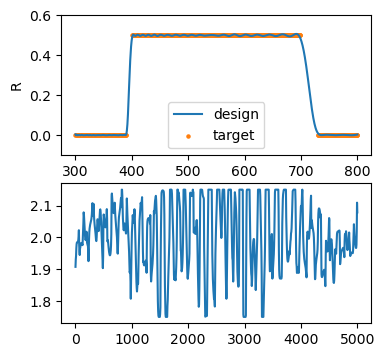

In [31]:
wls_full = np.linspace(300, 800, 1000)

fig, (ax, axn) = plt.subplots(2, 1)
fig.set_size_inches(4, 4)
ax.plot(wls_full, film.get_spec(0, wls_full).get_R(), label='design')
ax.scatter(wls, target.get_R(), label='target', s=5, color='C1')

ax.set_xlabel('wl / nm')
ax.set_ylabel('R')
ax.set_ylim(-0.1, 0.6)
ax.legend()

axn.plot(np.linspace(0, total_gt, film.get_n().shape[0]), film.get_n())
# axn.set_ylim(1.5, 2.5)

In [19]:
film.get_spec(0., wls).calculate()
